# Exploração dados COVID-19 em Portugal

In [1]:
import os
os.chdir("C:\\Users\\Utilizador\\Desktop\\5a\\1\\3WeekDeal\\TP")

In [2]:
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", 2)
globalConf = pd.read_csv("global_covid_confirmed.csv")
globalConf = globalConf.rename(columns={"Country/Region": "Country"})
globalConf = globalConf.drop("Lat", axis=1).drop("Long", axis=1)
globalConf["Country"].replace({"US": "United States of America"}, inplace=True)

globalConf = globalConf.groupby('Country').sum()
globalConf = globalConf.sort_values(by=['Country'], ascending=True)
globalConf

,1/22/20,...,4/28/20
Country,,,
Afghanistan,0,...,1828
Albania,0,...,750
Algeria,0,...,3649
Andorra,0,...,743
Angola,0,...,27
Antigua and Barbuda,0,...,24
Argentina,0,...,4127
Armenia,0,...,1867
Australia,0,...,6744


In [3]:
globalPop = pd.read_csv("C:\\Users\\Utilizador\\Desktop\\5a\\1\\3WeekDeal\\TP\\global_map.csv")
globalPop = globalPop.rename(columns={"SOVEREIGNT": "Country", "POP_EST": "Population"})
globalPop = globalPop[['Country','Population']]

globalPop = globalPop.groupby('Country').sum()
globalPop = globalPop.sort_values(by=['Country'], ascending=True)
globalPop

,Population
Country,
Afghanistan,34124811
Albania,3047987
Algeria,40969443
Andorra,85702
Angola,29310273
Antarctica,4050
Antigua and Barbuda,94731
Argentina,44293293
Armenia,3045191


In [4]:
globalPopConf = pd.merge(globalPop, globalConf, left_on='Country', right_on='Country')
globalPopConf

,Population,...,4/28/20
Country,,,
Afghanistan,34124811,...,1828
Albania,3047987,...,750
Algeria,40969443,...,3649
Andorra,85702,...,743
Angola,29310273,...,27
Antigua and Barbuda,94731,...,24
Argentina,44293293,...,4127
Armenia,3045191,...,1867
Australia,23237428,...,6744


In [5]:
globalPopDens = globalPopConf.copy()
for i in range(1, len(globalPopDens.columns)):
    globalPopDens.iloc[:, i] = round(globalPopDens["Population"]/globalPopDens.iloc[:, i])
globalPopDens

,Population,...,4/28/20
Country,,,
Afghanistan,34124811,...,18668.0
Albania,3047987,...,4064.0
Algeria,40969443,...,11228.0
Andorra,85702,...,115.0
Angola,29310273,...,1085566.0
Antigua and Barbuda,94731,...,3947.0
Argentina,44293293,...,10733.0
Armenia,3045191,...,1631.0
Australia,23237428,...,3446.0


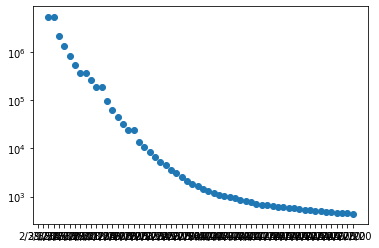

In [6]:
import matplotlib.pyplot as plt
globalDens = globalPopDens.copy().drop("Population", axis=1)
x = globalDens.columns
y = globalDens.loc["Portugal"]
plt.yscale("symlog")
plt.scatter(x, y)

In [7]:
import sys
print(sys.executable)
print(sys.path)
#os.environ['QT_QPA_PLATFORM'] = 'offscreen'
#os.environ['PATH'] = 'D:\QGIS\apps\qgis-ltr\bin;' + os.environ['PATH']
#sys.path.extend(['D:\\QGIS\\apps\\qgis-ltr\\python', 'D:\\QGIS\\apps\\qgis-ltr\\python\\plugins', 'D:\\QGIS\\apps\\Python37\\DLLs', 'D:\\QGIS\\apps\\Python37', 'D:\\QGIS\\apps\\Python37\\lib', 'D:\\QGIS\\apps\\Python37\\lib\\site-packages', 'D:\\QGIS\\apps\\qgis-ltr\\.\\python', 'C:\\Users\\Utilizador\\AppData\\Roaming\\QGIS\\QGIS3\\profiles\\default\\python', 'C:\\Users\\Utilizador\\AppData\\Roaming\\QGIS\\QGIS3\\profiles\\default\\python\\plugins', 'D:\\QGIS\\apps\\qgis-ltr\\.\\python\\plugins', 'D:\\QGIS\\apps\\Python37', 'D:\\QGIS\\apps\\Python37\\Scripts', 'D:\\QGIS\\bin\\python37.zip', 'D:\\QGIS\\apps\\Python37\\DLLs', 'D:\\QGIS\\apps\\Python37\\lib', 'D:\\QGIS\\bin', 'D:\\QGIS\\apps\\Python37\\lib\\site-packages', 'D:\\QGIS\\apps\\Python37\\lib\\site-packages\\win32', 'D:\\QGIS\\apps\\Python37\\lib\\site-packages\\win32\\lib', 'D:\\QGIS\\apps\\Python37\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Utilizador\\AppData\\Roaming\\QGIS\\QGIS3\\profiles\\default\\python', '.'])
from osgeo import ogr
from qgis.core import *
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

d:\qgis\bin\python3.exe
['C:\\Users\\Utilizador\\Desktop\\5a\\1\\3WeekDeal\\Aula2', 'D:\\QGIS\\apps\\qgis-ltr\\python', 'd:\\qgis\\bin\\python37.zip', 'D:\\QGIS\\apps\\Python37\\DLLs', 'D:\\QGIS\\apps\\Python37\\lib', 'd:\\qgis\\bin', 'D:\\QGIS\\apps\\Python37', '', 'D:\\QGIS\\apps\\Python37\\lib\\site-packages', 'D:\\QGIS\\apps\\Python37\\lib\\site-packages\\win32', 'D:\\QGIS\\apps\\Python37\\lib\\site-packages\\win32\\lib', 'D:\\QGIS\\apps\\Python37\\lib\\site-packages\\Pythonwin', 'D:\\QGIS\\apps\\Python37\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Utilizador\\.ipython']
Application state:
QGIS_PREFIX_PATH env var:		D:\QGIS\apps\qgis-ltr
Prefix:		D:\QGIS\apps\qgis-ltr
Plugin Path:		D:\QGIS\apps\qgis-ltr/plugins
Package Data Path:	D:\QGIS\apps\qgis-ltr/.
Active Theme Name:	
Active Theme Path:	D:\QGIS\apps\qgis-ltr/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	D:\QGIS\apps\qgis-ltr/./svg/
		C:/Users/Utilizador/AppData/Roaming/pyt

In [8]:
globalConfGeo = "layers\\confirmed_amount.gpkg"
conn = ogr.Open(globalConfGeo)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(globalConfGeo, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))

Layer confirmed_amount loaded
Layer layer_styles loaded


In [9]:
globalDensGeo = "layers\\confirmed_density.gpkg"
conn = ogr.Open(globalDensGeo)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(globalDensGeo, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))

Layer confirmed_density loaded
Layer layer_styles loaded


In [10]:
#concelho = QgsProject.instance().mapLayersByName('concelho')[0]
#for c in concelho.getFeatures():
#        print("Em {} há {} caso(s) confirmados".format(c["concelho"], c["confirmados_concelho_25/04/2020"]))

In [11]:
#expr_sem_casos = QgsExpression( " \"confirmados_concelho_25/04/2020\" IS NULL " )
#virgens = list(concelho.getFeatures( QgsFeatureRequest( expr_sem_casos ) ))
#for c in virgens:
#        print("Em {} não há pelos menos 3 casos confirmados".format(c["concelho"]))

In [12]:
globalConfLay = QgsProject.instance().mapLayersByName('confirmed_amount')[0]
xt = globalConfLay.extent()
width  = 1000
height = int(width*xt.height()/xt.width())

options = QgsMapSettings()
options.setLayers([globalConfLay])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)

render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

globalConfLay.renderer()

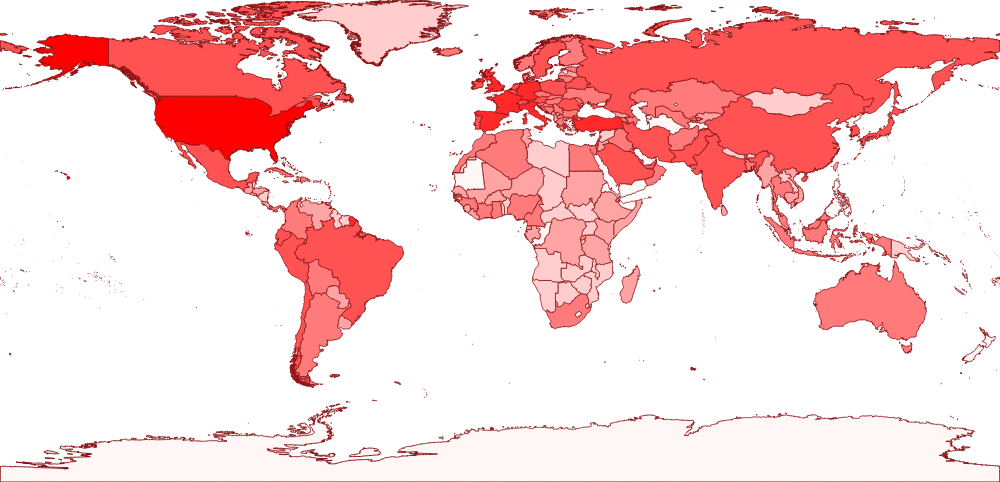

In [13]:
from IPython.display import Image
imgbuf = QBuffer()
imgbuf.open(QIODevice.ReadWrite)
image.save(imgbuf,"PNG")
bufData = imgbuf.data()
globalConfImg = Image(bufData)
globalConfImg

In [14]:
globalDensLay = QgsProject.instance().mapLayersByName('confirmed_density')[0]
xt = globalDensLay.extent()
width  = 1000
height = int(width*xt.height()/xt.width())

options = QgsMapSettings()
options.setLayers([globalDensLay])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)

render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

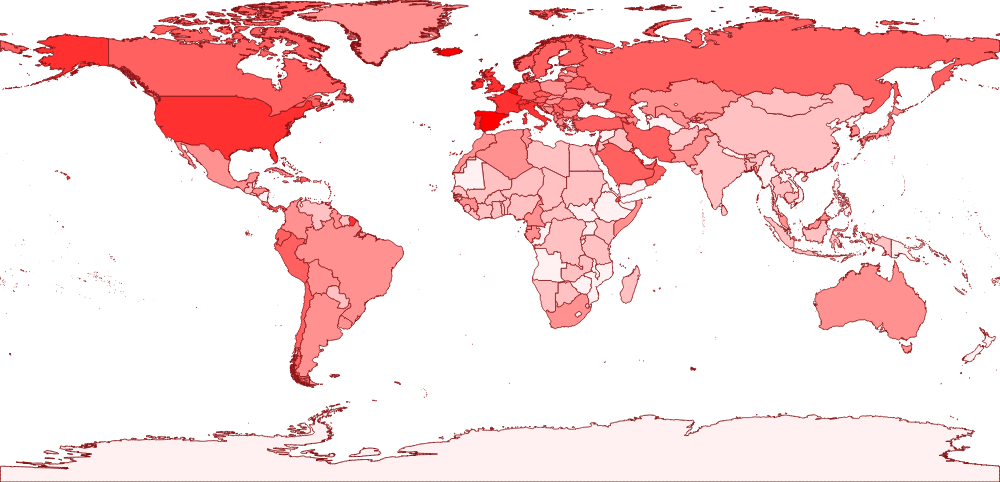

In [15]:
imgbuf = QBuffer()
imgbuf.open(QIODevice.ReadWrite)
image.save(imgbuf,"PNG")
bufData = imgbuf.data()
globalDensImg = Image(bufData)
globalDensImg

<IPython.core.display.Javascript object>


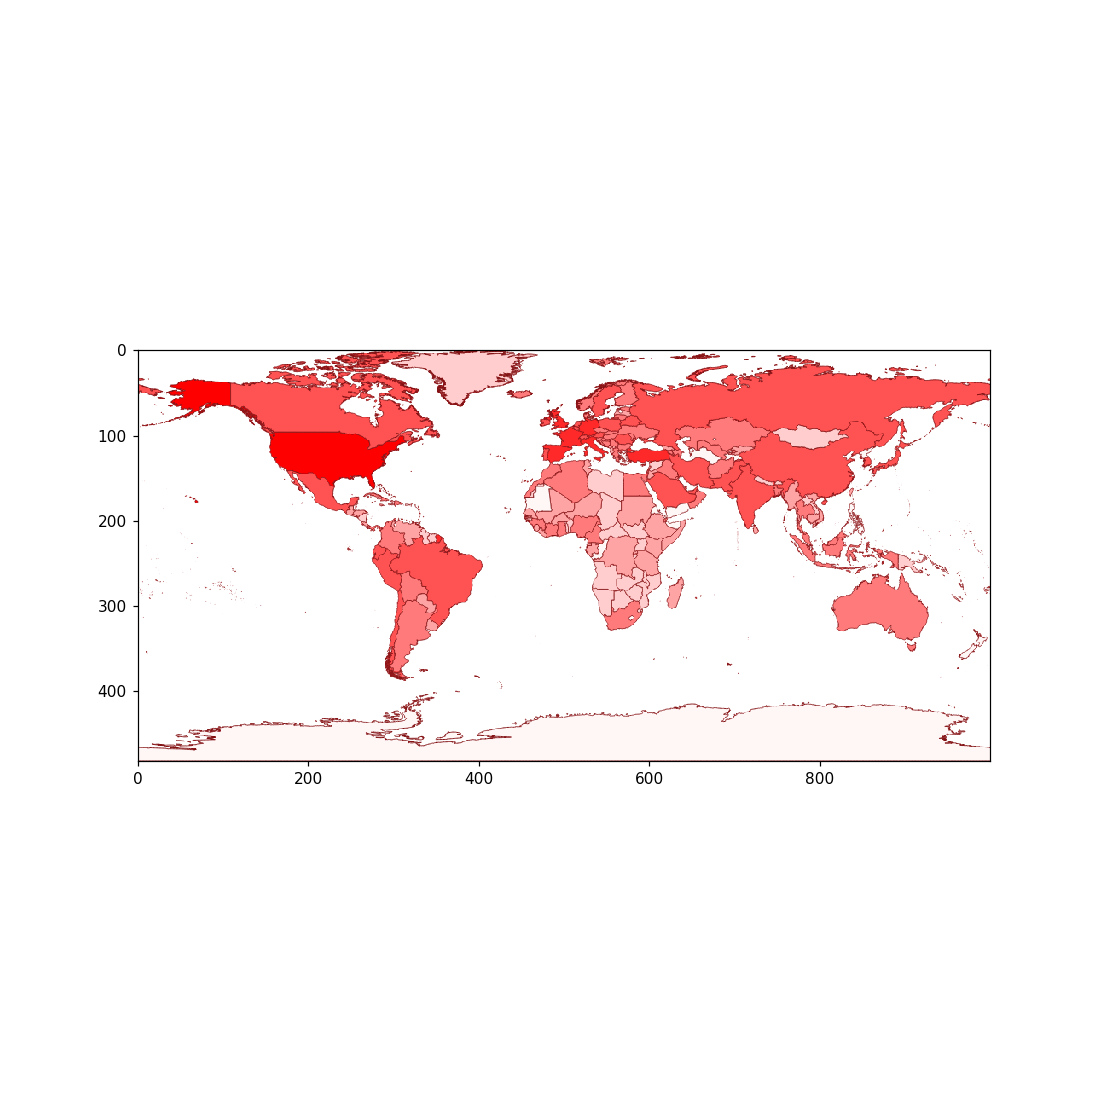

In [16]:
import matplotlib.animation as animation
%matplotlib notebook

with open("img\\1.png", "wb") as png:
    png.write(globalConfImg.data)
with open("img\\2.png", "wb") as png:
    png.write(globalDensImg.data)

img1 = plt.imread("img\\1.png")
img2 = plt.imread("img\\2.png")
fig = plt.figure(figsize = (10,10))
display = plt.imshow(img1, animated=True)

def update(i):
    if i % 2 == 0:
        display.set_data(img1)
    else:
        display.set_data(img2)

ani = animation.FuncAnimation(fig, update, frames=2, interval=1000, repeat=True)
plt.show()